### Ch6_2_1.py

In [1]:
import pandas as pd

# 載入資料集
df = pd.read_csv("./titanic_data.csv")
# 顯示資料集的形狀
print(df.shape)

(1309, 11)


### Ch6_2_1a.py

In [2]:
import pandas as pd

# 載入資料集
df = pd.read_csv("./titanic_data.csv")
# 查看前5筆記錄
print(df.head())
df.head().to_html("Ch6_2_1a_01.html")
# 顯示資料集的描述資料
print(df.describe())
df.describe().to_html("Ch6_2_1a_02.html")

   pclass  survived                                             name     sex  \
0       1         1                    Allen  Miss. Elisabeth Walton  female   
1       1         1                   Allison  Master. Hudson Trevor    male   
2       1         0                     Allison  Miss. Helen Loraine  female   
3       1         0             Allison  Mr. Hudson Joshua Creighton    male   
4       1         0  Allison  Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  
0  29.0000      0      0   24160  211.3375       B5        S  
1   0.9167      1      2  113781  151.5500  C22 C26        S  
2   2.0000      1      2  113781  151.5500  C22 C26        S  
3  30.0000      1      2  113781  151.5500  C22 C26        S  
4  25.0000      1      2  113781  151.5500  C22 C26        S  
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000

### Ch6_2_1b.py

In [3]:
import pandas as pd

# 載入資料集
df = pd.read_csv("./titanic_data.csv")
# 顯示資料集的資訊
print(df.info())
# 顯示沒有資料的筆數
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None
pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64


### Ch6_2_2.py

In [4]:
import pandas as pd
import numpy as np

seed = 7
np.random.seed(seed)
# 載入資料集
df = pd.read_csv("./titanic_data.csv")
# 刪除不需要的欄位
df = df.drop(["name", "ticket", "cabin"], axis=1)
# 處理遺失資料
df[["age"]] = df[["age"]].fillna(value=df[["age"]].mean())
df[["fare"]] = df[["fare"]].fillna(value=df[["fare"]].mean())
df[["embarked"]] = df[["embarked"]].fillna(value=df["embarked"].
                   value_counts().idxmax())
print(df["embarked"].value_counts())
print(df["embarked"].value_counts().idxmax())
# 轉換分類資料
df["sex"] = df["sex"].map( {"female": 1, "male": 0} ).astype(int)
# Embarked欄位的One-hot編碼
enbarked_one_hot = pd.get_dummies(df["embarked"], prefix="embarked")
df = df.drop("embarked", axis=1)
df = df.join(enbarked_one_hot)
# 將標籤的 survived 欄位移至最後
df_survived = df.pop("survived") 
df["survived"] = df_survived
print(df.head())
df.head().to_html("Ch6_2_2.html")
# 分割成訓練(80%)和測試(20%)資料集
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print("Train:", df_train.shape)
print("Test:", df_test.shape)
# 儲存處理後的資料
df_train.to_csv("titanic_train.csv", index=False)
df_test.to_csv("titanic_test.csv", index=False)

S    916
C    270
Q    123
Name: embarked, dtype: int64
S
   pclass  sex      age  sibsp  parch      fare  embarked_C  embarked_Q  \
0       1    1  29.0000      0      0  211.3375           0           0   
1       1    0   0.9167      1      2  151.5500           0           0   
2       1    1   2.0000      1      2  151.5500           0           0   
3       1    0  30.0000      1      2  151.5500           0           0   
4       1    1  25.0000      1      2  151.5500           0           0   

   embarked_S  survived  
0           1         1  
1           1         1  
2           1         0  
3           1         0  
4           1         0  
Train: (1045, 10)
Test: (264, 10)


### Ch6_2_3.py

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 11)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
Training ...

Testing ...
1045/1045 [==============================] - 0s 9us/step
訓練資料集的準確度 = 0.83
264/264 [==============================] - 0s 16us/step
測試資料集的準確度 = 0.82


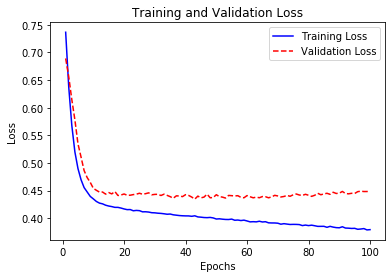

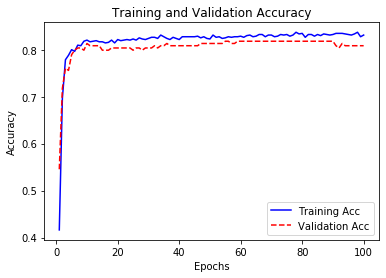

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

seed = 7
np.random.seed(seed)
# 載入Titanic的訓練和測試資料集
df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_train = dataset_train[:, 0:9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 定義模型
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=100, batch_size=10, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "b-", label="Training Loss")
plt.plot(epochs, val_loss, "r--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch6_2_3a.py

In [9]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

seed = 7
np.random.seed(seed)
# 載入Titanic的訓練和測試資料集
df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")
dataset_train = df_train.values
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_train = dataset_train[:, 0:9]
Y_train = dataset_train[:, 9]
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_train -= X_train.mean(axis=0)
X_train /= X_train.std(axis=0)
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 定義模型
model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
print("Training ...")
model.fit(X_train, Y_train, epochs=18, batch_size=10, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存Keras模型
print("Saving Model: titanic.h5 ...")
model.save("titanic.h5")

Training ...

Testing ...
1045/1045 [==============================] - 0s 34us/step
訓練資料集的準確度 = 0.80
264/264 [==============================] - 0s 20us/step
測試資料集的準確度 = 0.79
Saving Model: titanic.h5 ...


### Ch6_2_4.py

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.models import load_model

seed = 7
np.random.seed(seed)
# 載入Titanic的測試資料集
df_test = pd.read_csv("./titanic_test.csv")
dataset_test = df_test.values
# 分割成特徵資料和標籤資料
X_test = dataset_test[:, 0:9]
Y_test = dataset_test[:, 9]
# 特徵標準化
X_test -= X_test.mean(axis=0)
X_test /= X_test.std(axis=0)
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("titanic.h5")
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict_classes(X_test)
print(Y_pred[:,0])
print(Y_test.astype(int))
# 顯示混淆矩陣
tb = pd.crosstab(Y_test.astype(int), Y_pred[:,0],
                 rownames=["label"], colnames=["predict"])
print(tb)
tb.to_html("Ch6_2_4.html")


Testing ...
264/264 [==============================] - 0s 91us/step
測試資料集的準確度 = 0.79

Predicting ...
[1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 0]
[0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 